# 3b1f loss

**Goal:** Look at the compariso of the loss traiig with differet hyperparameters.

In [40]:
import matplotlib.pyplot as plt
import os
import json


os.sys.path += ['../PyATLASstyle/','../../hh4b/hh4b-plots/'] 

from hh4b_plots.phys_utils import get_lumi

#from matplotlib.colors import LogNorm

# Let's do ATLAS style plots too!
import matplotlib as mpl
import PyATLASstyle as pas
pas.applyATLASstyle(mpl)

from hh4b_plots.colors import *

%load_ext autoreload
%autoreload 2


In [32]:
# %%bash
# ls ../gp-for-flows/models/data161718-MAY21_3b1f_detaCut_ggf/10_layers_H_64_1_blocks_K_8_B_3_lr_0.001_p0.1_iter0//

In [75]:
os.listdir('../gp-for-flows/models/data161718-MAY21_3b1f_detaCut_ggf/nsf_rq-coupling_log_pT_h1_log_pT_h2_eta_h1_eta_h2_X_wt_tag_log_dphi_hh_lu_15_layers_H_64_1_blocks_K_8_B_3_lr_0.001_iter0/')

[]

In [36]:
'../gp-for-flows/models/data161718-MAY21_3b1f_detaCut_ggf/nsf_rq-coupling_log_pT_h1_log_pT_h2_eta_h1_eta_h2_X_wt_tag_log_dphi_hh_lu_10_layers_H_32_1_blocks_K_4_B_3_lr_0.001_1e-06_p/

SyntaxError: EOL while scanning string literal (<ipython-input-36-28feeaecbba6>, line 1)

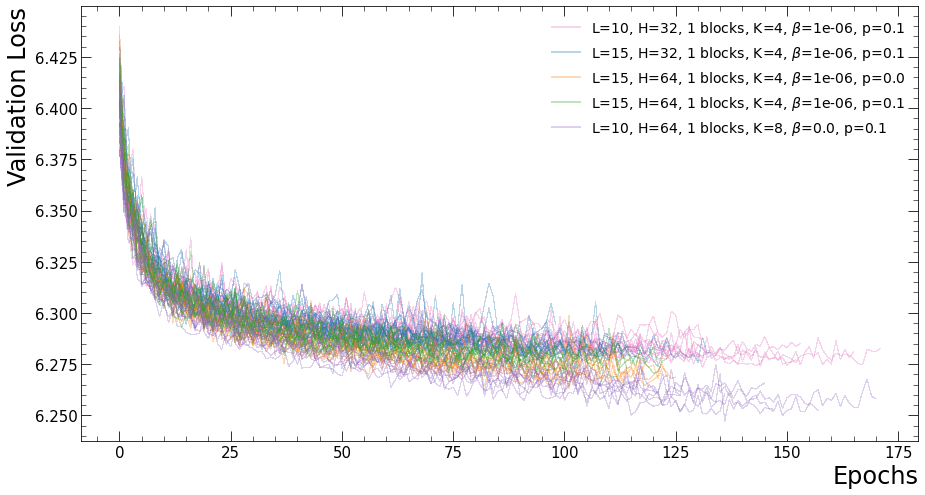

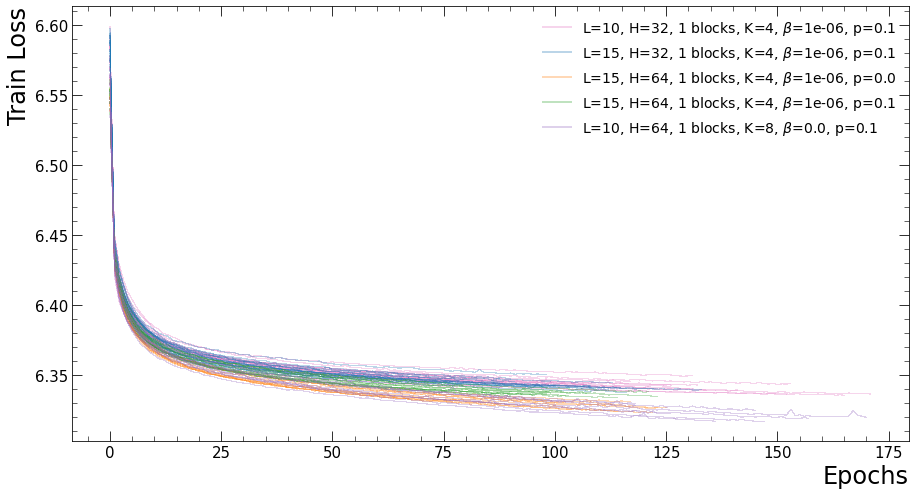

In [89]:
for k, ylabel in zip(['val_loss','train_loss'],['Validation','Train']):

    plt.figure(figsize=(15,8))

    for tag,c in zip(['']+[f'-hp{i}' for i in range(6)],['C6','C0','C1','C0','C1','C2','C4']):

        fc = f'../gp-for-flows/configs/val1p1{tag}.json'

        with open(fc,'r') as cfile:
            hps = json.load(cfile)

        L,H,nb,K,lr,beta,p = hps['L'],hps['H'],hps['nb'],hps['K'],hps['lr'],hps['beta'],hps['p']
        colTag = '_'.join(hps['cols'])
        hpi = f'nsf_rq-coupling_{colTag}_lu_{L}_layers_H_{H}_{nb}_blocks_K_{K}_B_3_lr_{lr}'
        if beta > 0: hpi += f'_{beta}'
        if p > 0: hpi += f'_p{p}'
        hpi += '_iter0'

        
        l = f'L={L}, H={H}, {nb} blocks, K={K}, '+r'$\beta$'+f'={beta}, p={p}'
        
        for s in range(25):
            
            try:
                with open(f'../gp-for-flows/models/data161718-MAY21_3b1f_detaCut_ggf/{hpi}/loss_acc_seed{s}.json') as f:
                    d = json.load(f)

                plt.plot(d[k],color=c,ls=ls,alpha=.3,lw=0.1, label=l)
                l=None

            except FileNotFoundError:
                #print(f'{hpi}, loss_acc_seed{s}.json not found')
                pass
   
                        
    plt.xlabel('Epochs',loc='right',fontsize=24)
    plt.ylabel(f'{ylabel} Loss',loc='top',fontsize=24)
    plt.legend()
    
    plt.savefig(f'figures/data161718-MAY21_3b1f_detaCut_ggf/{k}-hp-scan.pdf',bbox_inches='tight')

In [15]:
d.keys()

dict_keys(['train_loss', 'val_loss', 'test_loss', 'SR_loss'])

In [19]:
d['SR_loss']

[6.5860700607299805,
 6.559980392456055,
 6.547635555267334,
 6.527937889099121,
 6.538163661956787,
 6.526643753051758,
 6.51583194732666,
 6.524730682373047,
 6.512092590332031,
 6.510775566101074,
 6.511543273925781,
 6.50586462020874,
 6.506110668182373,
 6.504444599151611,
 6.506217956542969,
 6.507544994354248,
 6.510417938232422,
 6.505007743835449,
 6.504397392272949,
 6.505525588989258,
 6.503108501434326,
 6.5029215812683105,
 6.50059175491333,
 6.499175548553467,
 6.506423473358154,
 6.501133918762207,
 6.498522758483887,
 6.498133182525635,
 6.493955135345459,
 6.506820201873779,
 6.501565933227539,
 6.505779266357422,
 6.496415138244629,
 6.499627113342285,
 6.505507469177246,
 6.500063896179199,
 6.510446071624756,
 6.501999378204346,
 6.495032787322998,
 6.492562770843506,
 6.49660062789917,
 6.502146244049072,
 6.500768184661865,
 6.496923446655273,
 6.4960174560546875,
 6.497494220733643,
 6.495578289031982,
 6.495431900024414,
 6.495596408843994,
 6.495563507080078,
 